<a href="https://www.kaggle.com/code/kavitakhandelwal1234/titanic-notebook-solution?scriptVersionId=95289408" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Titanic - Machine Learning from Disaster
### Author: Kavita Khandelwal
### Date: 09/22/2021


## 1. Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

## 2. Ask
## 2.1 Business Task
In this challenge, we need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 3. Prepare
This is a Titanic-Disaster historical dataset. The data has been split into two groups:
* training set (train.csv)
* test set (test.csv)
You can download the training dataset [here](https://www.kaggle.com/c/titanic/data?select=train.csv) and test dataset [here](https://www.kaggle.com/c/titanic/data?select=test.csv). 

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.


## 3.1 Required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3.2 Importing data

In [2]:
df1= pd.read_csv("/kaggle/input/titanic/train.csv")
df2= pd.read_csv("/kaggle/input/titanic/test.csv")

## 3.3 Getting to know data

In [3]:
print(df1.head())
print(df2.head())
print(df1.dtypes)
print(df2.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
# summary of numerical variable
print(df1.describe())
print(df2.describe())
# summary of categorial variable
print(df1.describe(include="object"))
print(df2.describe(include="object"))

print(df1.info())
print(df2.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [5]:
# checking null values
print(df1.isnull().sum())
print(df2.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 4. Process
##  4.1 Data cleaning

In [6]:
# age_mean, fair mean
mean_age1 = df1["Age"].mean()
mean_age2 = df2["Age"].mean()
mean_fare = df2["Fare"].mean()


In [7]:
#remove null values
df1["Age"].replace(np.nan, mean_age1, inplace=True)
df2["Age"].replace(np.nan, mean_age1, inplace=True)
df2["Fare"].replace(np.nan, mean_fare, inplace=True)

In [8]:
# drop cabin column
df1.drop(columns=["Cabin", "Name"], axis=1, inplace=True)
df2.drop(columns=["Cabin", "Name"], axis=1, inplace=True)

In [9]:
#print(df1["Embarked"].value_counts())
#drop 2 rows of missing Embarked values and reset index
df1.dropna(subset=["Embarked"], axis=0, inplace=True)
df1.reset_index(drop=True, inplace=True)

## 5. Data analysis

## 5.1 Correlation

In [10]:
# correlation
correlation= df1.corr()
print(correlation)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030300 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074673 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.327954  0.081656  0.016824   
Age             0.030300 -0.074673 -0.327954  1.000000 -0.231875 -0.178232   
SibSp          -0.057686 -0.034040  0.081656 -0.231875  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178232  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088604  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.088604  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


In [11]:
# again checking null values
print(df1.isnull().sum())
print(df2.isnull().sum())

print(df1.info())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
me

## 5.2 Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


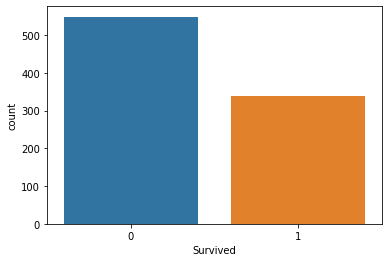

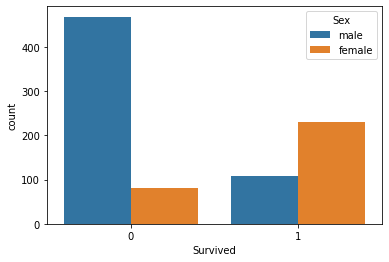

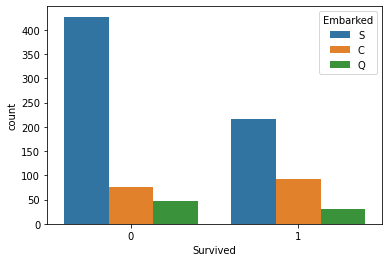

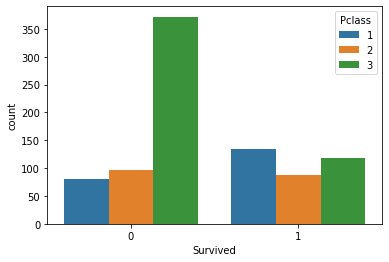

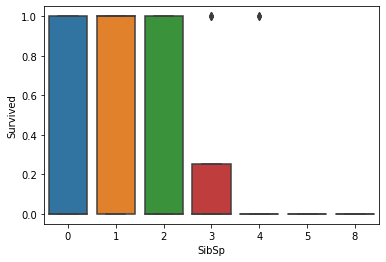

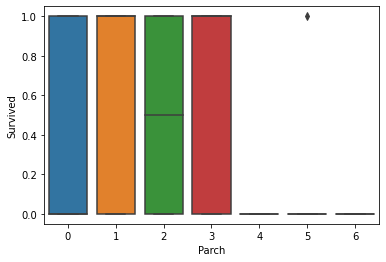

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


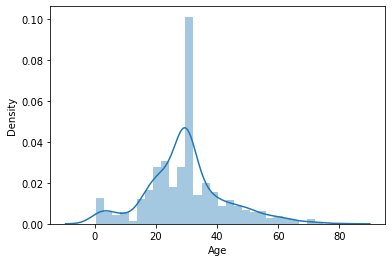

In [12]:
# plot
a = sns.countplot(df1["Survived"])
plt.show(a)

b = sns.countplot(x= "Survived",data=df1, hue="Sex")
plt.show(b)

c= sns.countplot(x="Survived", data=df1, hue="Embarked")
plt.show(c)

d= sns.countplot(x="Survived", data=df1, hue="Pclass")
plt.show(d)

e= sns.boxplot(x="SibSp", y= "Survived", data=df1)
plt.show(e)
e= sns.boxplot(x="Parch", y= "Survived", data=df1)
plt.show(e)
a= sns.distplot(df1["Age"])
plt.show(a)

## 6. Classification Methods
* Removing insignificant variables

In [13]:
# change categorical to int for df1 sex, embarked and ans will be same if we donot choose drop first
embarked1=pd.get_dummies(df1["Embarked"], drop_first=True)
sex1=pd.get_dummies(df1["Sex"], drop_first=True)

df1=pd.concat([df1, embarked1, sex1],axis=1)
# correlation of between passengerid, age and survived is small so dropping
df1.drop(columns=["Sex", "Embarked", "Ticket"], axis=1, inplace=True)

# change categorical to int for df2
embarked1=pd.get_dummies(df2["Embarked"], drop_first=True)
sex1=pd.get_dummies(df2["Sex"], drop_first=True)

df2=pd.concat([df2, embarked1, sex1],axis=1)
df2.drop(columns=["Sex", "Embarked", "Ticket"], axis=1, inplace=True)

In [14]:
# checking data
print(df1.head())
print(df2.head())
print(df1.corr())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Q  S  male
0            1         0       3  22.0      1      0   7.2500  0  1     1
1            2         1       1  38.0      1      0  71.2833  0  0     0
2            3         1       3  26.0      0      0   7.9250  0  1     0
3            4         1       1  35.0      1      0  53.1000  0  1     0
4            5         0       3  35.0      0      0   8.0500  0  1     1
   PassengerId  Pclass   Age  SibSp  Parch     Fare  Q  S  male
0          892       3  34.5      0      0   7.8292  1  0     1
1          893       3  47.0      1      0   7.0000  0  1     0
2          894       2  62.0      0      0   9.6875  1  0     1
3          895       3  27.0      0      0   8.6625  0  1     1
4          896       3  22.0      1      1  12.2875  0  1     0
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030300 -0.057686 -0.001657   
Survived       -

* train_x and train_y data

In [15]:
x_train= df1.drop(columns=["Survived"], axis=1)
y_train= df1["Survived"]

x_test= df2.copy()

## 6.1 Method 1 - Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [17]:
df1["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

                                predicted values
                             
                           negative 0        positive 1
                              
                neg 0          TN               FP

actual values  
                    
                 pos 1        FN                TP
                 
                 
                 
**positive =1= survived**

In [18]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(x_train, y_train)
# logistic.coef_
# logistic.intercept_
y_pred_trainlr = logistic.predict(x_train)
y_pred_testlr= logistic.predict(x_test)
#print(y_pred_testlog)


#Confusion matrix 
# if y_test given, in that case
# confusion_matrix = confusion_matrix(y_test, y_pred_testlr)
confusion_matrix1 = confusion_matrix(y_train, y_pred_trainlr)
print(confusion_matrix1)
#or
con = pd.DataFrame(confusion_matrix1)
con.index=["actual not survived 0", "actual survived 1"]
con.columns=["predicted not survived(0)", "predicted survived(1)"]
print(con)


#Accuracy score 
#accuracy_score = accuracy_score(y_test,y_pred_testlr) 
accuracy_score1= logistic.score(x_train, y_train)
print(accuracy_score1)
accuracy_score = accuracy_score(y_train,y_pred_trainlr)
print('Accuracy score for Logistic Regression test data is:', accuracy_score )


a=classification_report(y_train,y_pred_trainlr)
print(a)

[[475  74]
 [101 239]]
                       predicted not survived(0)  predicted survived(1)
actual not survived 0                        475                     74
actual survived 1                            101                    239
0.8031496062992126
Accuracy score for Logistic Regression test data is: 0.8031496062992126
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.70      0.73       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.79       889
weighted avg       0.80      0.80      0.80       889



AUC:  0.8566913104039431


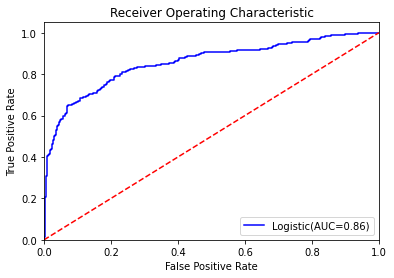

In [19]:
# ROC Curve and AUC
# probs = logistic.predict_proba(x_test)
probs = logistic.predict_proba(x_train)
#print(probs)

preds = probs[:,1]
#print(preds)


#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr, tpr, threshold = roc_curve(y_train, preds)


roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)


plt.plot(fpr, tpr, 'b', label = "Logistic(AUC={:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## 6.2 Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
pred_y_train = model.predict(x_train)



print(classification_report(y_train, pred_y_train))
print(confusion_matrix(y_train, pred_y_train))


#Accuracy score 
#accuracy_score = accuracy_score(y_test,y_pred_testlr) 
accuracy_score1= model.score(x_train, y_train)
print(accuracy_score1)
accuracy_score = accuracy_score(y_train,pred_y_train)
print('Accuracy score for decision tree :', accuracy_score )



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       340

    accuracy                           1.00       889
   macro avg       1.00      1.00      1.00       889
weighted avg       1.00      1.00      1.00       889

[[549   0]
 [  0 340]]
1.0
Accuracy score for decision tree : 1.0


[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 

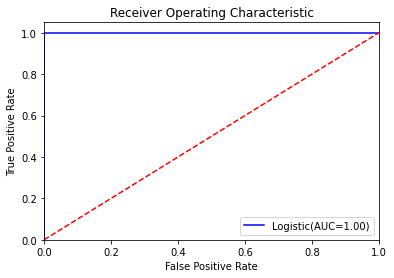

In [22]:
# ROC Curve and AUC
#probs = model.predict_proba(x_test)
probs = model.predict_proba(x_train)
print(probs)

preds = probs[:,1]
print(preds)


#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr, tpr, threshold = roc_curve(y_train, preds)


roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)


plt.plot(fpr, tpr, 'b', label = "Logistic(AUC={:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

this decision tree model seems overfitting.

## 6.3 Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [24]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
pred_y_train = model.predict(x_train)



print(classification_report(y_train, pred_y_train))
print(confusion_matrix(y_train, pred_y_train))


#Accuracy score 
#accuracy_score = accuracy_score(y_test,y_pred_testlr) 
accuracy_score1= model.score(x_train, y_train)
print(accuracy_score1)
accuracy_score = accuracy_score(y_train,pred_y_train)
print('Accuracy score for Random forest is:', accuracy_score )


              precision    recall  f1-score   support

           0       0.84      0.95      0.89       549
           1       0.89      0.71      0.79       340

    accuracy                           0.85       889
   macro avg       0.86      0.83      0.84       889
weighted avg       0.86      0.85      0.85       889

[[519  30]
 [100 240]]
0.8537682789651294
Accuracy score for Random forest is: 0.8537682789651294


[[0.85849918 0.14150082]
 [0.04027371 0.95972629]
 [0.42424409 0.57575591]
 ...
 [0.63756444 0.36243556]
 [0.54256962 0.45743038]
 [0.87176682 0.12823318]]
[0.14150082 0.95972629 0.57575591 0.92544855 0.1601331  0.18785652
 0.24387268 0.19148156 0.63430451 0.86917088 0.67815786 0.82489818
 0.15329052 0.18152777 0.53582481 0.80018756 0.10715284 0.28173254
 0.51940459 0.68989117 0.24681096 0.25673721 0.77723664 0.35030052
 0.29828622 0.44213614 0.16903811 0.23097043 0.7709543  0.14357727
 0.27480267 0.91268929 0.77123208 0.17355578 0.32599278 0.28077597
 0.17070478 0.15000966 0.44696779 0.65754266 0.39922986 0.7192508
 0.15058447 0.85545628 0.74057319 0.13743343 0.21048127 0.74675248
 0.19061507 0.47520823 0.12643996 0.12656545 0.93966762 0.8035865
 0.24134365 0.29064281 0.76331655 0.12542705 0.87385747 0.11400669
 0.1318991  0.30593766 0.17930909 0.2887181  0.29582973 0.76703725
 0.13450381 0.51386746 0.13062208 0.17281656 0.242193   0.23178565
 0.1875436  0.31213753 0.12885953 0.118543

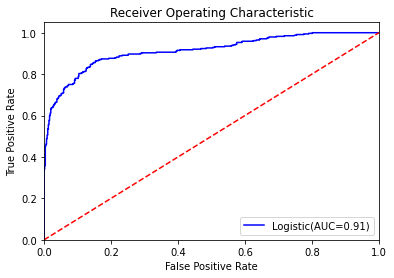

In [25]:
# ROC Curve and AUC
#probs = model.predict_proba(x_test)
probs = model.predict_proba(x_train)
print(probs)

preds = probs[:,1]
print(preds)


#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr, tpr, threshold = roc_curve(y_train, preds)


roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)


plt.plot(fpr, tpr, 'b', label = "Logistic(AUC={:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## 6.4 KNN/ K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [27]:
#sorting k nearest neighbours classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
pred_y_train = model.predict(x_train)



print(classification_report(y_train, pred_y_train))
print(confusion_matrix(y_train, pred_y_train))


#Accuracy score 
#accuracy_score = accuracy_score(y_test,y_pred_testlr) 
accuracy_score1= model.score(x_train, y_train)
print(accuracy_score1)
accuracy_score = accuracy_score(y_train,pred_y_train)
print('Accuracy score for knn is:', accuracy_score )

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       549
           1       0.79      0.63      0.70       340

    accuracy                           0.80       889
   macro avg       0.80      0.77      0.77       889
weighted avg       0.80      0.80      0.79       889

[[493  56]
 [125 215]]
0.796400449943757
Accuracy score for knn is: 0.796400449943757


[[0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 ...
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [1.         0.        ]]
[0.33333333 0.66666667 0.33333333 0.66666667 0.33333333 0.66666667
 0.66666667 0.33333333 0.66666667 0.33333333 0.33333333 0.66666667
 0.33333333 0.33333333 0.33333333 0.66666667 0.         0.66666667
 0.66666667 0.66666667 0.33333333 0.66666667 0.33333333 0.66666667
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.66666667 0.33333333 0.33333333 0.66666667
 0.66666667 0.66666667 0.33333333 0.66666667 0.33333333 0.
 0.33333333 0.33333333 0.33333333 0.33333333 0.         0.33333333
 0.33333333 0.33333333 0.33333333 0.66666667 0.33333333 0.66666667
 0.33333333 0.66666667 0.33333333 0.33333333 0.33333333 0.
 0.33333333 0.33333333 0.66666667 0.66666667 0.66666667 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.         0.66666667
 0.         0.33333333 0.         0.         0.33333333 

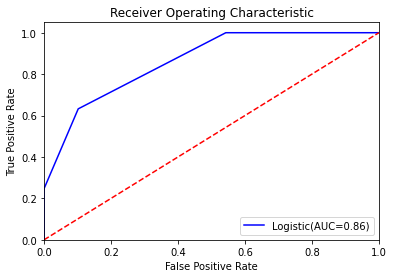

In [28]:
# ROC Curve and AUC
#probs = model.predict_proba(x_test)
probs = model.predict_proba(x_train)
print(probs)

preds = probs[:,1]
print(preds)


#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr, tpr, threshold = roc_curve(y_train, preds)


roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)


plt.plot(fpr, tpr, 'b', label = "Logistic(AUC={:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## 6.5 Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, precision_score, recall_score

In [30]:
#Create a svm Classifier
model = SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
model.fit(x_train, y_train)
svcpred_y = model.predict(x_test)
pred_y_train = model.predict(x_train)



print(classification_report(y_train, pred_y_train))
print(confusion_matrix(y_train, pred_y_train))


#Accuracy score 
#accuracy_score = accuracy_score(y_test,y_pred_testlr) 
accuracy_score1= model.score(x_train, y_train)
print(accuracy_score1)
accuracy_score = accuracy_score(y_train,pred_y_train)
print('Accuracy score for SVC is {:.5f}'.format(accuracy_score))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       549
           1       0.76      0.68      0.72       340

    accuracy                           0.80       889
   macro avg       0.79      0.77      0.78       889
weighted avg       0.79      0.80      0.79       889

[[475  74]
 [108 232]]
0.7952755905511811
Accuracy score for SVC is 0.79528


[[0.86350175 0.13649825]
 [0.12053476 0.87946524]
 [0.24469707 0.75530293]
 ...
 [0.43116359 0.56883641]
 [0.66408455 0.33591545]
 [0.86155148 0.13844852]]
[0.13649825 0.87946524 0.75530293 0.84283023 0.1354922  0.17483906
 0.22145476 0.11141108 0.68220086 0.87112359 0.7621735  0.79970526
 0.17371312 0.04988274 0.79584829 0.72971071 0.1087832  0.21068245
 0.69218902 0.79499185 0.20029388 0.19676171 0.8228167  0.30973497
 0.64648285 0.4583681  0.19008808 0.2715425  0.77613717 0.1473322
 0.31927527 0.9156539  0.77588524 0.11417704 0.3579077  0.21859113
 0.1896923  0.16998678 0.69323603 0.80633769 0.64563271 0.78725345
 0.18978215 0.85857492 0.81005282 0.14687503 0.14356377 0.77520952
 0.12996049 0.74232168 0.08527614 0.1693638  0.85498808 0.78277448
 0.21038976 0.30087413 0.83699292 0.19250775 0.80336009 0.05682577
 0.2130894  0.22458042 0.09241109 0.36462869 0.13515151 0.81387124
 0.17455315 0.48757546 0.10127585 0.19974241 0.46205872 0.27495391
 0.16634784 0.16017235 0.15766507 0.14581

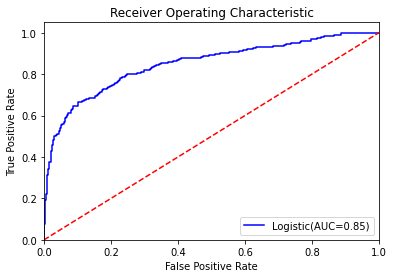

In [31]:
# ROC Curve and AUC
#probs = model.predict_proba(x_test)
probs = model.predict_proba(x_train)
print(probs)

preds = probs[:,1]
print(preds)


#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr, tpr, threshold = roc_curve(y_train, preds)


roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)


plt.plot(fpr, tpr, 'b', label = "Logistic(AUC={:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## 6.6 Generalized Boosted Model (gbm)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, precision_score, recall_score

In [33]:
model = GradientBoostingClassifier()
#Train the model using the training sets
model.fit(x_train, y_train)
gbpred_y = model.predict(x_test)
pred_y_train = model.predict(x_train)



print(classification_report(y_train, pred_y_train))
print(confusion_matrix(y_train, pred_y_train))


#Accuracy score 
#accuracy_score = accuracy_score(y_test,y_pred_testlr) 
accuracy_score1= model.score(x_train, y_train)
print(accuracy_score1)
accuracy_score = accuracy_score(y_train,pred_y_train)
print('Accuracy score for gb is {:.5f}'.format(accuracy_score))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.92      0.81      0.86       340

    accuracy                           0.90       889
   macro avg       0.90      0.88      0.89       889
weighted avg       0.90      0.90      0.90       889

[[524  25]
 [ 63 277]]
0.9010123734533183
Accuracy score for gb is 0.90101


[[0.90870329 0.09129671]
 [0.03452171 0.96547829]
 [0.28055019 0.71944981]
 ...
 [0.84898205 0.15101795]
 [0.34451172 0.65548828]
 [0.95198101 0.04801899]]
[0.09129671 0.96547829 0.71944981 0.97285626 0.15044189 0.19823174
 0.08706831 0.04385412 0.71738813 0.96673971 0.83808334 0.93266824
 0.12940034 0.12440812 0.45117985 0.90532688 0.07213325 0.32819269
 0.43293661 0.93500857 0.21573938 0.45857047 0.90110576 0.64893419
 0.20700856 0.51556749 0.21149651 0.03916321 0.83801257 0.11907113
 0.19584143 0.94783308 0.83801257 0.03013509 0.28915433 0.07182477
 0.3062976  0.10491448 0.30830145 0.67936524 0.18366387 0.69101034
 0.14229059 0.97181746 0.8036633  0.11074697 0.13575637 0.80622997
 0.12372863 0.34811109 0.03489213 0.13270578 0.92487789 0.88925266
 0.06408326 0.37763774 0.89011925 0.18262684 0.97318319 0.02137776
 0.18729852 0.11686291 0.07569532 0.36041929 0.15527134 0.87988576
 0.11345701 0.66358609 0.0932004  0.17625084 0.11162234 0.10506449
 0.12802061 0.56364666 0.1416459  0.1018

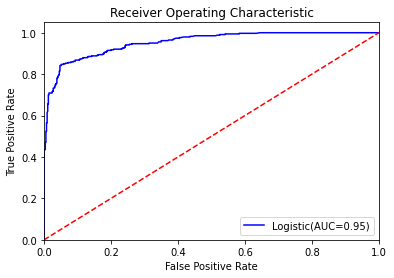

In [34]:
# ROC Curve and AUC
#probs = model.predict_proba(x_test)
probs = model.predict_proba(x_train)
print(probs)

preds = probs[:,1]
print(preds)


#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr, tpr, threshold = roc_curve(y_train, preds)


roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)


plt.plot(fpr, tpr, 'b', label = "Logistic(AUC={:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## 6.8 Extreme Gradient Boosting (XGBoost)

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, precision_score, recall_score

In [36]:
model = XGBClassifier()
#Train the model using the training sets
model.fit(x_train, y_train)
xgbpred_y = model.predict(x_test)
pred_y_train = model.predict(x_train)



print(classification_report(y_train, pred_y_train))
print(confusion_matrix(y_train, pred_y_train))


#Accuracy score 
#accuracy_score = accuracy_score(y_test,y_pred_testlr) 
accuracy_score1= model.score(x_train, y_train)
print(accuracy_score1)
accuracy_score = accuracy_score(y_train,pred_y_train)
print('Accuracy score for xgb is {:.5f}'.format(accuracy_score))

[23:26:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       340

    accuracy                           1.00       889
   macro avg       1.00      1.00      1.00       889
weighted avg       1.00      1.00      1.00       889

[[549   0]
 [  1 339]]
0.9988751406074241
Accuracy score for xgb is 0.99888


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[[0.94452095 0.05547902]
 [0.00222921 0.9977708 ]
 [0.14539504 0.85460496]
 ...
 [0.9873646  0.0126354 ]
 [0.03853315 0.96146685]
 [0.97407836 0.02592164]]
[5.54790199e-02 9.97770786e-01 8.54604959e-01 9.98914957e-01
 5.32939620e-02 2.56354939e-02 7.57726235e-03 3.22481059e-02
 9.58801806e-01 9.93712962e-01 9.44519043e-01 9.69848216e-01
 3.66935767e-02 6.86387345e-02 2.56198943e-01 9.79747713e-01
 1.30844787e-02 8.15773249e-01 1.94546506e-01 9.85802650e-01
 7.91830644e-02 7.76200116e-01 9.93178487e-01 8.62652123e-01
 1.74245071e-02 8.45286846e-01 3.44968408e-01 2.07347702e-02
 9.90324259e-01 5.03030047e-02 1.29766930e-02 9.93214965e-01
 9.90326941e-01 1.49232401e-02 9.91408527e-02 3.64891551e-02
 4.60976958e-01 2.67044976e-02 3.72806601e-02 9.07592237e-01
 7.71192908e-02 1.20507427e-01 2.52269488e-02 9.55871105e-01
 9.80964601e-01 4.76591028e-02 9.58499238e-02 9.81914222e-01
 7.96137676e-02 4.33066078e-02 1.22368596e-02 7.54344929e-03
 9.94781196e-01 9.76494253e-01 1.64723303e-02 7.685

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


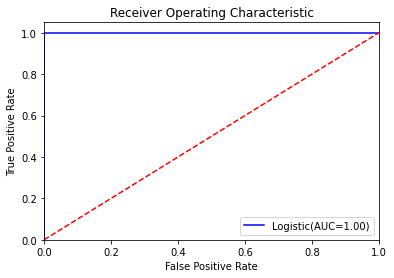

In [37]:
# ROC Curve and AUC
#probs = model.predict_proba(x_test)
probs = model.predict_proba(x_train)
print(probs)

preds = probs[:,1]
print(preds)


#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr, tpr, threshold = roc_curve(y_train, preds)


roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)


plt.plot(fpr, tpr, 'b', label = "Logistic(AUC={:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## 7. Submission

In [38]:
submission= pd.DataFrame({"PassengerId": df2["PassengerId"], "Survived": svcpred_y})
submission.to_csv("Titanic_data_solution.csv ", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
